In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

## Data Exctraction

In [5]:
# Reading yield data
df_yield_raw=pd.read_excel('/Users/ruhidmirzayev/Palette/Notebooks/Cohort 7/rm_mb_yield_2004_2023.xlsx')

# Reading Shapely
gdf_rm=gpd.read_file('/Users/ruhidmirzayev/Palette/Notebooks/Cohort 7/MUNICIPALITY.geojson')

## Exploratory Data Analysis

In [34]:
df_yield_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95278 entries, 0 to 95277
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Year                    95278 non-null  int64 
 1   Risk Area / R.M.        95278 non-null  object
 2   Crop                    95278 non-null  object
 3   Variety                 95278 non-null  object
 4   Farms                   95278 non-null  object
 5   Acres                   95278 non-null  object
 6   Yield/acre(Metric)      95278 non-null  object
 7   Yield/acre(Metric).1    33975 non-null  object
 8   Yield/acre(Imperial)    33975 non-null  object
 9   Yield/acre(Imperial).1  33975 non-null  object
dtypes: int64(1), object(9)
memory usage: 7.3+ MB


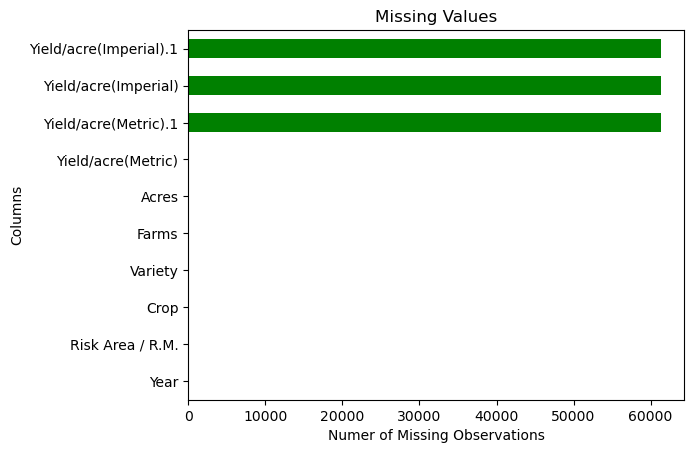

In [20]:
# Looking at missing values
df_yield_raw.isna().sum().plot(kind='barh', color='green')
plt.title('Missing Values')
plt.ylabel('Columns')
plt.xlabel('Numer of Missing Observations')
plt.show()

In [26]:
print('Number of duplicated values:', df_yield_raw.duplicated().sum())

Number of duplicated values: 20


In [35]:
# Unique Values
df_yield_raw.nunique()

Year                        20
Risk Area / R.M.            99
Crop                         5
Variety                   1139
Farms                      127
Acres                     8813
Yield/acre(Metric)        2353
Yield/acre(Metric).1         1
Yield/acre(Imperial)      1515
Yield/acre(Imperial).1       1
dtype: int64

In [56]:
# Dropping Unncesseary Columns
df_yield_raw_1=df_yield_raw.drop(columns=['Variety', 'Yield/acre(Metric)', 'Yield/acre(Metric).1', 'Yield/acre(Imperial).1' ])

# Creating new clean yield column
df_yield_raw_1['Yield']=df_yield_raw_1['Yield/acre(Imperial)'].str.replace(' Bushels','')

# Dropping old yield column
df_yield_raw_2=df_yield_raw_1.drop(columns='Yield/acre(Imperial)')

# Removing observations that have not enough values
df_yield_raw_3=df_yield_raw_2.loc[df_yield_raw_2['Farms']!='Below']

In [62]:
print('Missing Values:', df_yield_raw_3.isna().sum())
print('Duplicated Values:',df_yield_raw_3.duplicated().sum())

Missing Values: Year                0
Risk Area / R.M.    0
Crop                0
Farms               0
Acres               0
Yield               0
dtype: int64
Duplicated Values: 0


<Axes: ylabel='Frequency'>

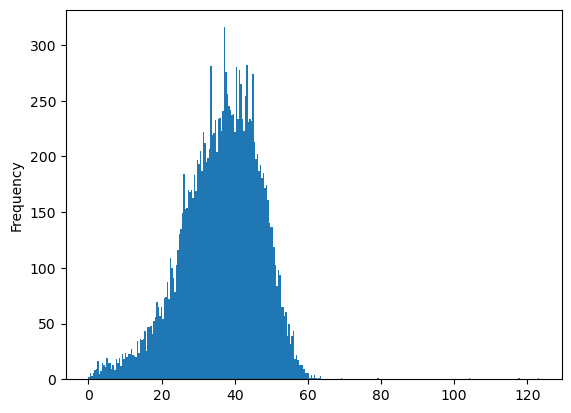

In [76]:
df_yield_raw_3[df_yield_raw_3['Crop']=='ARGENTINE CANOLA']['Yield'].astype('float').plot(kind='hist', bins=300)